##Klasifikasi Prediksi kanker paru-paru menggunakan algoritma SVM

## Nama : Muhammad Bastian Hanafi
## NIM : 20.11.3714
## Kelas : 20 IF 07

## Import Library

<table>
<thead>
<tr>
<th>Column name</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td><strong>Age</strong></td>
<td>The age of the patient. (Numeric)</td>
</tr>
<tr>
<td><strong>Gender</strong></td>
<td>The gender of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Air Pollution</strong></td>
<td>The level of air pollution exposure of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Alcohol use</strong></td>
<td>The level of alcohol use of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Dust Allergy</strong></td>
<td>The level of dust allergy of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>OccuPational Hazards</strong></td>
<td>The level of occupational hazards of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Genetic Risk</strong></td>
<td>The level of genetic risk of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>chronic Lung Disease</strong></td>
<td>The level of chronic lung disease of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Balanced Diet</strong></td>
<td>The level of balanced diet of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Obesity</strong></td>
<td>The level of obesity of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Smoking</strong></td>
<td>The level of smoking of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Passive Smoker</strong></td>
<td>The level of passive smoker of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Chest Pain</strong></td>
<td>The level of chest pain of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Coughing of Blood</strong></td>
<td>The level of coughing of blood of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Fatigue</strong></td>
<td>The level of fatigue of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Weight Loss</strong></td>
<td>The level of weight loss of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Shortness of Breath</strong></td>
<td>The level of shortness of breath of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Wheezing</strong></td>
<td>The level of wheezing of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Swallowing Difficulty</strong></td>
<td>The level of swallowing difficulty of the patient. (Categorical)</td>
</tr>
<tr>
<td><strong>Clubbing of Finger Nails</strong></td>
<td>The level of clubbing of finger nails of the patient. (Categorical)</td>
</tr>
</tbody>
</table>


In [1]:
import pandas as pd
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Import Dataset

In [2]:
df = pd.read_csv("/content/cancer patient data sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


## Exploratory data analysis (EDA)

melihat tipedata di setiap column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [4]:
df.shape

(1000, 26)

check missing value

In [5]:
df.isna().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
df.drop('Patient Id', inplace=True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

find column where datatype is Object

In [8]:
dataType = df.columns.to_series().groupby(df.dtypes).groups
dataType

{int64: ['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'], object: ['Level']}

## find correlation 

untuk menemukan korelasi data yang berupa object harus diubah dulu kedalam numerik, salah satu caranya adalah dengan menggunakan LabelEncoder dari library sklearn

In [9]:
le = LabelEncoder()

In [10]:
df["Label"]=le.fit_transform(df["Level"])
df.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Label
0,0,33,1,2,4,5,4,3,2,2,...,4,2,2,3,1,2,3,4,Low,1
1,1,17,1,3,1,5,3,4,2,2,...,3,7,8,6,2,1,7,2,Medium,2
2,2,35,1,4,5,6,5,5,4,6,...,7,9,2,1,4,6,7,2,High,0
3,3,37,1,7,7,7,7,6,7,7,...,2,3,1,4,5,6,7,5,High,0
4,4,46,1,6,8,7,7,7,6,7,...,2,4,1,4,2,4,2,3,High,0


LOW = 1

MEDIUM = 2

HIGH = 3

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

check outlier 

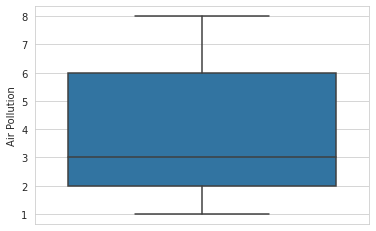

In [12]:
sns.set_style("whitegrid")
# create boxplot
sns.boxplot(y = df['Air Pollution'])

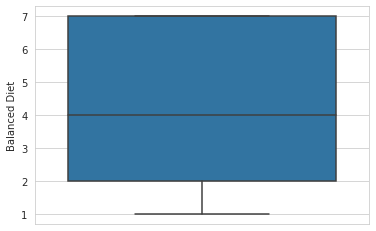

In [13]:
sns.boxplot(y = df['Balanced Diet'])

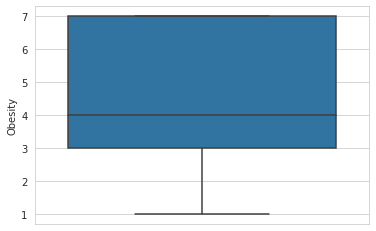

In [14]:
sns.boxplot(y = df['Obesity'])

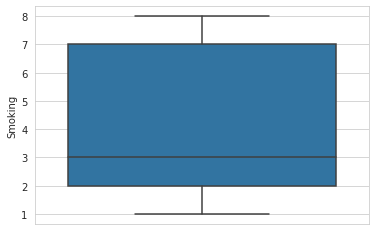

In [15]:
sns.boxplot(y = df['Smoking'])

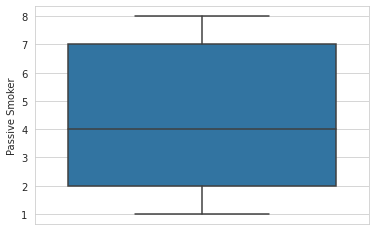

In [16]:
sns.boxplot(y = df['Passive Smoker'])

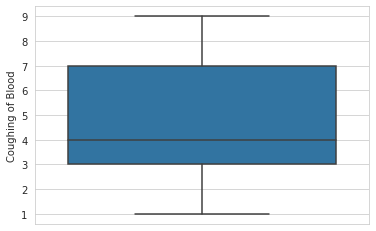

In [17]:
sns.boxplot(y = df['Coughing of Blood'])

check korelasi menggunakan pearson correlation

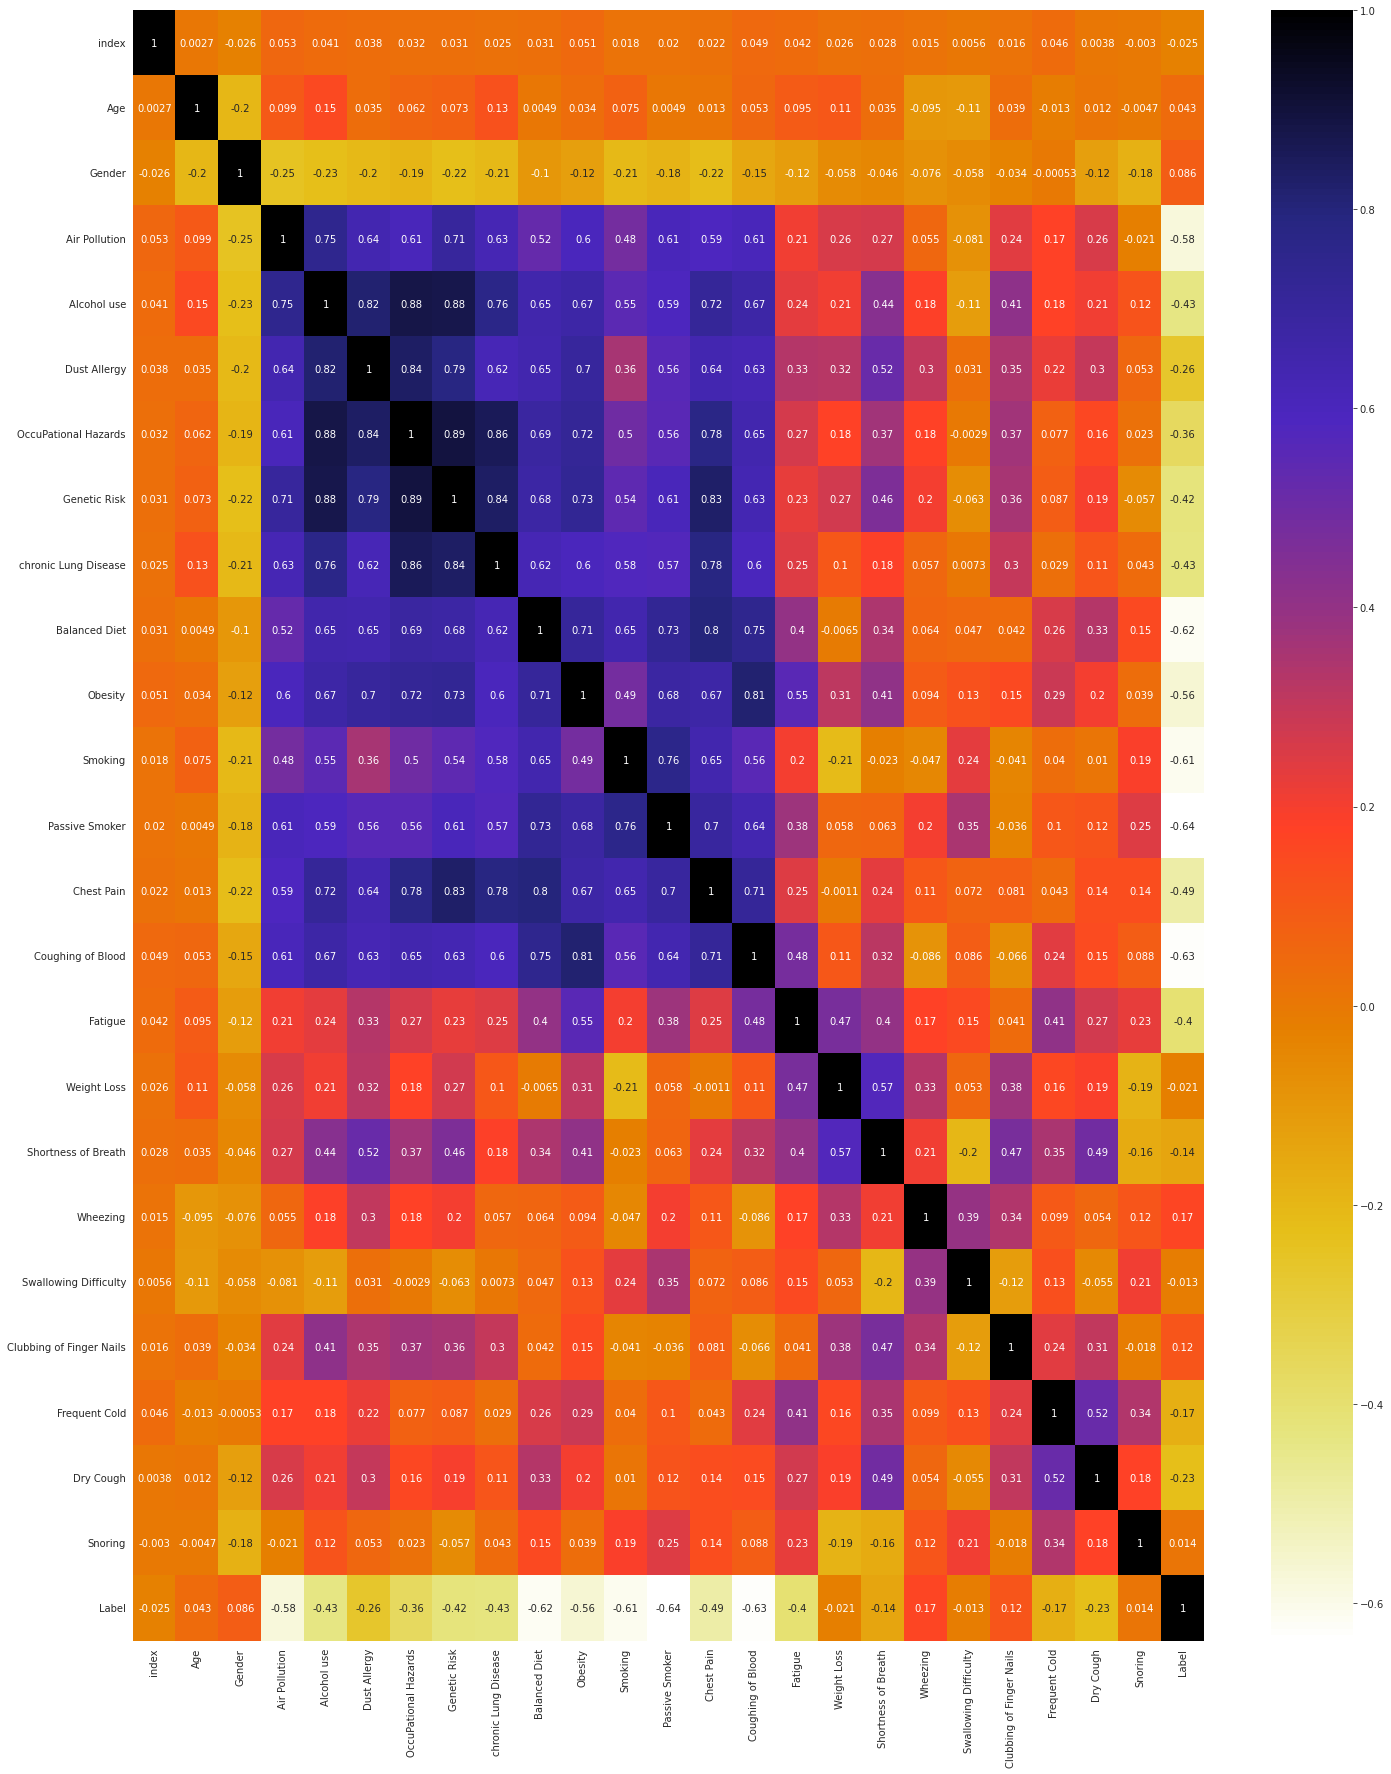

In [18]:
corr = df.corr()
plt.figure(figsize=(24,30))
sns.heatmap(corr, cmap=plt.cm.CMRmap_r, annot=True)
plt.show()

karena yang akan diperedikasi adalah claim diterima atau tidak, maka target korelasi nya adalah column is_claim, saya menggunakan minimal nilai korelasi 0.5

In [19]:
cor_target = abs(corr['Label'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

Air Pollution        0.577269
Balanced Diet        0.618781
Obesity              0.561961
Smoking              0.611087
Passive Smoker       0.638409
Coughing of Blood    0.631118
Label                1.000000
Name: Label, dtype: float64

seleksi fitur yang memiliki korelasi lebih besar dari 0,5

In [20]:
df = df.filter(['Air Pollution', 'Balanced Diet','Obesity','Smoking','Passive Smoker','Coughing of Blood','Level'])
df.head()

,Air Pollution,Balanced Diet,Obesity,Smoking,Passive Smoker,Coughing of Blood,Level
0,2,2,4,3,2,4,Low
1,3,2,2,2,4,3,Medium
2,4,6,7,2,3,8,High
3,7,7,7,7,7,8,High
4,6,7,7,8,7,9,High


dari data diatas tidak terdapat outlier sehingga tidak perlu dilakukan handling outlier.

selanjutnya adalah memisahkan variabel terikat menjadi y dan variabel bebas menjadi x

In [21]:
#X adalah variabel independen - berisi 'Air Pollution', 'Balanced Diet','Obesity','Smoking','Passive Smoker','Coughing of Blood'
X = df.iloc[:, [0,1,2,3,4,5]].values

#y adalah variabel dependen - Level / target 
y = df.iloc[:, -1].values

#menampilkan nilai x dan y
print('X : \n',X[:5])
print('\ny : \n',y[:5])

X : 
 [[2 2 4 3 2 4]
 [3 2 2 2 4 3]
 [4 6 7 2 3 8]
 [7 7 7 7 7 8]
 [6 7 7 8 7 9]]

y : 
 ['Low' 'Medium' 'High' 'High' 'High']


split data menjadi data training dan testing

In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0) # 75% training and 25% test

##membangun model klasifikasi dengan kernel linear

In [23]:
clf = svm.SVC(kernel='linear')
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Text(0.5, 1.0, 'SVM with linear kernel')

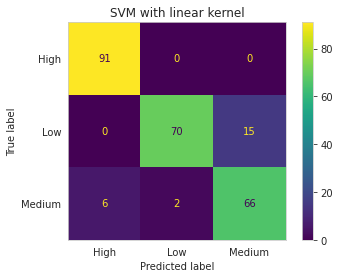

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() 
plt.grid(False)
disp.ax_.set_title("SVM with linear kernel")

dari confussion matrix di atas kita bisa mendapatkan informasi :
1. Prediksi kemungkinan kangker paru paru tinggi (High)
- True Positive = 91, berarti model yang telah dibuat berhasil memperediksi 91 data dengan kemungkinan tinggi akan menderita kangker paru-paru
- False Positive = 0, berarti model yang dibuat tidak ada data yang diperediksi tidak berkemungkinan tinggi menderita kangker paru paru
- False Negative = 6, berarti dari model yang dibuat terdapat 6 data yang sebenarnya berkemungkinan tinggi menderita kangker paru paru tetapi diperediksi berkemungkinan sedang.

2. Prediksi kemungkinan kangker paru paru sedang (Medium)
- True Positive = 66, berarti model yang telah dibuat berhasil memperediksi 66 data yang memiliki kemungkinan akan menderita kangker paru-paru sedang (medium)

- False Positive = 8, terdapat pasien yang berkemungkinan tidak menderita kangker paru-paru sedang tatapi terklasifikasi kedalam kangker paru paru sedang.

- False Negatve = 15, terdapat pasien yang salah diperediksi akan menderita kangker paru paru sedang

3. Prediksi kemungkinan kangker paru paru rendah (Low) 
- True Positive = 70, berarti model yang telah dibuat berhasil memperediksi 70 data dengan kemungkinan rendah akan menderita kangker paru-paru

- False Positive = 15, terdapat pasien yang berkemungkinan tidak menderita kangker paru-paru rendah tatapi terklasifikasi kedalam kangker paru paru rebdah.

- False Negatve = 2, terdapat pasien yang salah diperediksi akan menderita kangker paru paru rendah



In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.94      1.00      0.97        91
         Low       0.97      0.82      0.89        85
      Medium       0.81      0.89      0.85        74

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.90       250
weighted avg       0.91      0.91      0.91       250



##membangun model klasifikasi dengan kernel polynomial

[[91  0  0]
 [ 0 77  8]
 [ 0  2 72]]


Text(0.5, 1.0, 'SVM with polynominal kernel')

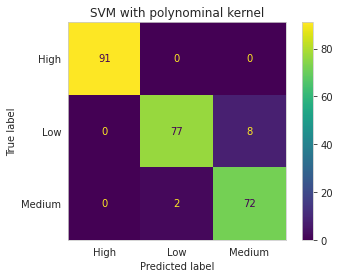

In [26]:
clf = svm.SVC(kernel='poly')
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() 
plt.grid(False)
disp.ax_.set_title("SVM with polynominal kernel")

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       0.97      0.91      0.94        85
      Medium       0.90      0.97      0.94        74

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



##membangun model klasifikasi dengan kernel RBF

[[91  0  0]
 [ 0 81  4]
 [ 0  2 72]]


Text(0.5, 1.0, 'SVM with RBF kernel')

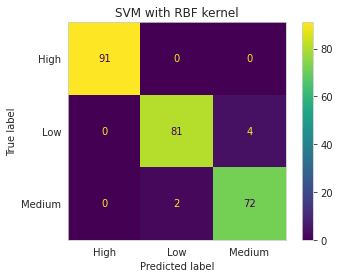

In [28]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() 
plt.grid(False)
disp.ax_.set_title("SVM with RBF kernel")


- Terdapat 91 data yang masuk kedalam kelas High (TP). Berarti terdapat 91 dari 250 data yang terklasifikasi kemungkinan terkena kanker tinggi (High), tidak ada data yang terklasifikasi sebagai tidak berkemungkinan terkena kanker tinggi (FP), dan tidak ada juga data yang terklasifikasi  berkemungkinan terkena kanker tinggi tetapi diprediksi tidak terkena kanker Tinggi (FN).
- Terdapat 81 data yang masuk kedalam kelas Low (TP). Berarti terdapat 81 dari 250 data yang terklasifikasi berkemungkinan terkena kanker rendah (Low). Terdapat 4 data yang sebenarnya tidak termasuk kedalam kelas low tetapi terprediksi masuk ke kelas low (FP), dan terdapat 2 data yang terklasifikasi berkemungkinan terkena kanker rendah tetapi tidak diklasifikasi terkena kanker rendah(FN).
- Terdapat 72 data yang masuk kedalam kelas Medium (TP). Berarti terdapat 72 dari 250 data yang terklasifikasi berkemungkinan terkena kanker sedang (Medium). Terdapat 2 data yang sebenarnya tidak termasuk kedalam kelas medium tetapi terprediksi masuk ke kelas medium (FP), dan terdapat 4 data yang terklasifikasi berkemungkinan terkena kanker sedang tetapi tidak diklasifikasi terkena kanker sedang(FN).



In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        91
         Low       0.98      0.95      0.96        85
      Medium       0.95      0.97      0.96        74

    accuracy                           0.98       250
   macro avg       0.97      0.98      0.97       250
weighted avg       0.98      0.98      0.98       250



Kesimpulan :     
dari ke 3 kernel yang di coba, hasil paling bagus terdapat pada kernel RBF dengan akurasi 98%. model dapat memperediksi orang yang memiliki keungkinan akan menderita kangker paru paru dengan sangat bagus, hal tersebut dapat dilihat pada confusion matrix,jumlah data False positif dan False Negatif terbilang sangat sedikit.